In [7]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import sklearn as sk
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


Load Data

In [8]:
def show_audio(data):
    spectrogram_np = np.array(data)
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram_np, cmap='jet', origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    plt.show()

def npy_loader(path):
    return torch.from_numpy(np.load(path))



In [14]:
audioData = npy_loader('training.npy')
audioLabels = npy_loader('training_labels.npy')

torch.Size([52890, 32, 96])
torch.Size([52890])
Number of entries equal to 0: 14530
Number of entries equal to 1: 27340
Number of entries equal to 2: 4823
Number of entries equal to 3: 4412
Number of entries equal to 4: 1785


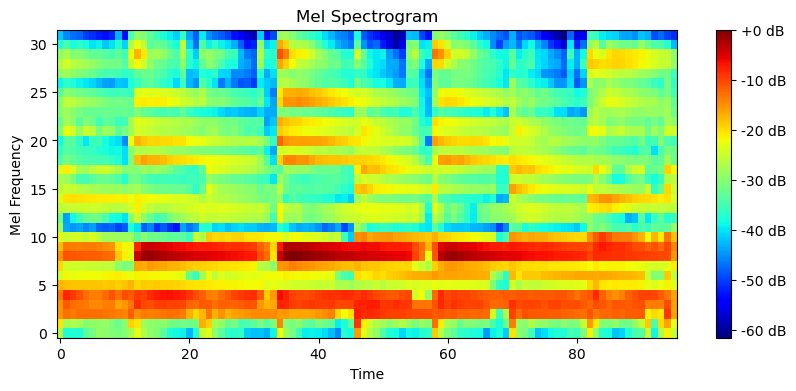

In [20]:
print(audioData.shape)
print(audioLabels.shape)
for i in range(5):
    num_entries = (audioLabels == i).sum().item()
    print(f"Number of entries equal to {i}: {num_entries}")


firstData = audioData[0,:,:]
show_audio(firstData)

PCA Analysis

Explained variance ratio: [4.4029146e-01 1.1220708e-01 8.5846581e-02 5.5075414e-02 3.1886015e-02
 1.7286763e-02 1.4059282e-02 1.3435046e-02 1.1081890e-02 1.0624748e-02
 9.6929763e-03 8.4115323e-03 8.1352536e-03 6.7499806e-03 6.4465180e-03
 5.5798236e-03 5.4552080e-03 5.3567789e-03 5.2731838e-03 4.6401960e-03
 4.2506289e-03 3.9731609e-03 3.8244501e-03 3.6154774e-03 3.0536309e-03
 2.9461428e-03 2.6739233e-03 2.5290796e-03 2.3635901e-03 2.3034005e-03
 2.2096576e-03 2.1809549e-03 1.9680264e-03 1.9437310e-03 1.9103343e-03
 1.7697518e-03 1.6813680e-03 1.5831941e-03 1.5518347e-03 1.5269869e-03
 1.3503857e-03 1.3325340e-03 1.2907899e-03 1.2302322e-03 1.2010608e-03
 1.1909651e-03 1.0965961e-03 1.0320460e-03 1.0173765e-03 1.0073893e-03
 9.8518981e-04 9.4717223e-04 9.2490454e-04 8.9728198e-04 8.6666434e-04
 8.5613853e-04 8.4254611e-04 8.3664065e-04 8.2255341e-04 8.0832210e-04
 7.7153096e-04 7.4718648e-04 7.2550651e-04 6.9262198e-04 6.6725916e-04
 6.5715599e-04 6.3682901e-04 6.3056243e-04 6.229052

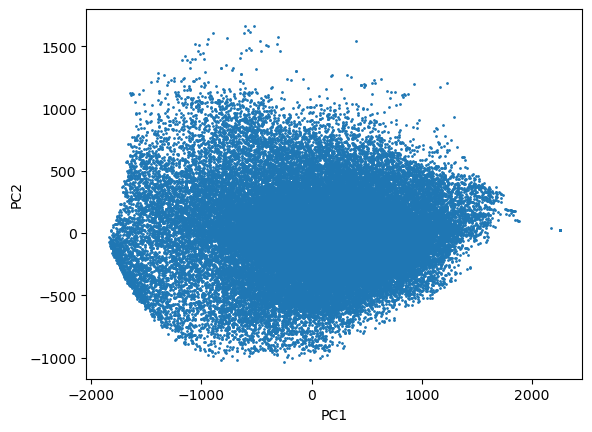

[4.4029146e-01 1.1220708e-01 8.5846581e-02 5.5075414e-02 3.1886015e-02
 1.7286763e-02 1.4059282e-02 1.3435046e-02 1.1081890e-02 1.0624748e-02
 9.6929763e-03 8.4115323e-03 8.1352536e-03 6.7499806e-03 6.4465180e-03
 5.5798236e-03 5.4552080e-03 5.3567789e-03 5.2731838e-03 4.6401960e-03
 4.2506289e-03 3.9731609e-03 3.8244501e-03 3.6154774e-03 3.0536309e-03
 2.9461428e-03 2.6739233e-03 2.5290796e-03 2.3635901e-03 2.3034005e-03
 2.2096576e-03 2.1809549e-03 1.9680264e-03 1.9437310e-03 1.9103343e-03
 1.7697518e-03 1.6813680e-03 1.5831941e-03 1.5518347e-03 1.5269869e-03
 1.3503857e-03 1.3325340e-03 1.2907899e-03 1.2302322e-03 1.2010608e-03
 1.1909651e-03 1.0965961e-03 1.0320460e-03 1.0173765e-03 1.0073893e-03
 9.8518981e-04 9.4717223e-04 9.2490454e-04 8.9728198e-04 8.6666434e-04
 8.5613853e-04 8.4254611e-04 8.3664065e-04 8.2255341e-04 8.0832210e-04
 7.7153096e-04 7.4718648e-04 7.2550651e-04 6.9262198e-04 6.6725916e-04
 6.5715599e-04 6.3682901e-04 6.3056243e-04 6.2290527e-04 6.0352497e-04
 5.954

In [13]:
data = audioData.view(audioData.shape[0], -1).numpy()

pca = PCA(n_components=100)
pca.fit(data)

transformed_data = pca.transform(data)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print(pca.explained_variance_ratio_)

print(sum(pca.explained_variance_ratio_))

Try simple CNN